<a href="https://colab.research.google.com/github/semoona/elevvo-ml-internship-2-weeks-/blob/main/Task2_K_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this is taksk 2 of ellevo machine learning track, The task elaborates having a customer dataset, and our task it to make
# cluster corelation between customer income and their spending scores
# make k-mean clustering on these variables
#determien the optimal number of cluters whaterve the hell that means
# then visualize these clusters


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# first of all import the dataset and see what it is actually consisting of
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [20]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


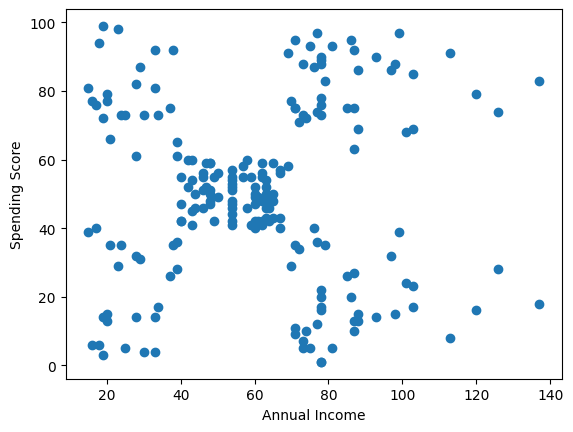

In [21]:
import seaborn as sns
# use scatter plot to see the grouping of the two variables we are working with
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
# label these varable so they show in the graph
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [25]:
# from this graph at one glance i see like 5 clusters just with one glance
#now we have have done the clustering step after that comes the scaling step
# since income and spending score are very unbalanced we do smth call scaling to normalize the data so each data point has the same range
from sklearn.preprocessing import StandardScaler
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled_fit = pd.DataFrame(df_scaled)
df_scaled_fit.columns = ["Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


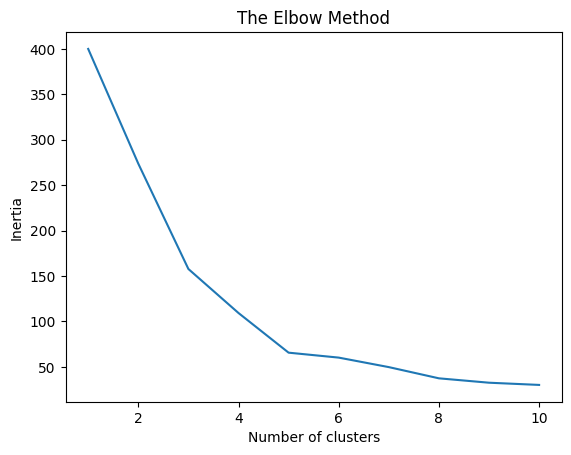

In [28]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Now plot the results
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [32]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5, random_state=42)
pred = model.fit_predict(df_scaled)
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

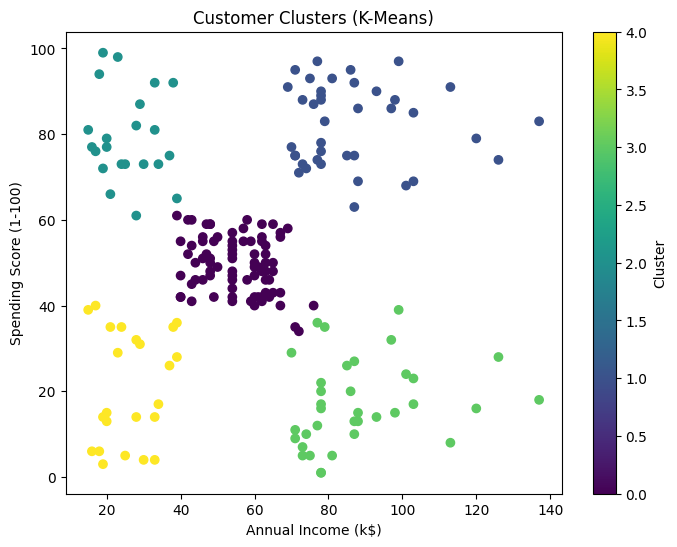

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=pred, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters (K-Means)')
plt.colorbar(label='Cluster')
plt.show()

# Task
Implement spectral clustering and DBSCAN, visualize their results, and analyze the average spending per cluster for K-Means, spectral clustering, and DBSCAN.

## Implement spectral clustering

### Subtask:
Apply Spectral Clustering to the scaled data.


**Reasoning**:
Apply Spectral Clustering to the scaled data as instructed by importing the necessary class, instantiating the model with specified parameters, and fitting it to the scaled data to obtain cluster labels.



In [34]:
from sklearn.cluster import SpectralClustering

spectral_model = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=42)
spectral_labels = spectral_model.fit_predict(df_scaled)

## Visualize spectral clustering results

### Subtask:
Visualize the clusters obtained from Spectral Clustering using a 2D plot.


**Reasoning**:
Create a scatter plot of the original data colored by the spectral clustering labels.



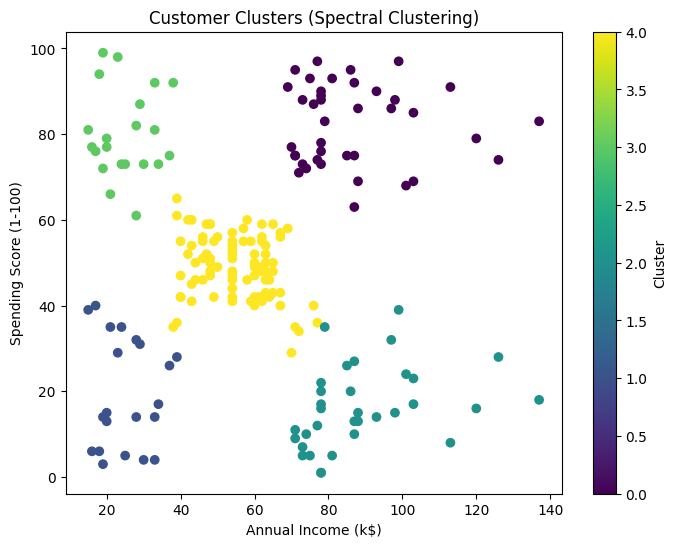

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=spectral_labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters (Spectral Clustering)')
plt.colorbar(label='Cluster')
plt.show()

## Implement dbscan

### Subtask:
Apply DBSCAN to the scaled data.


**Reasoning**:
Apply DBSCAN to the scaled data by importing the necessary class, instantiating it, and fitting it to the scaled data to obtain cluster labels.



In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

## Visualize dbscan results

### Subtask:
Visualize the clusters obtained from DBSCAN using a 2D plot.


**Reasoning**:
Create a scatter plot of the original data colored by the DBSCAN cluster labels.



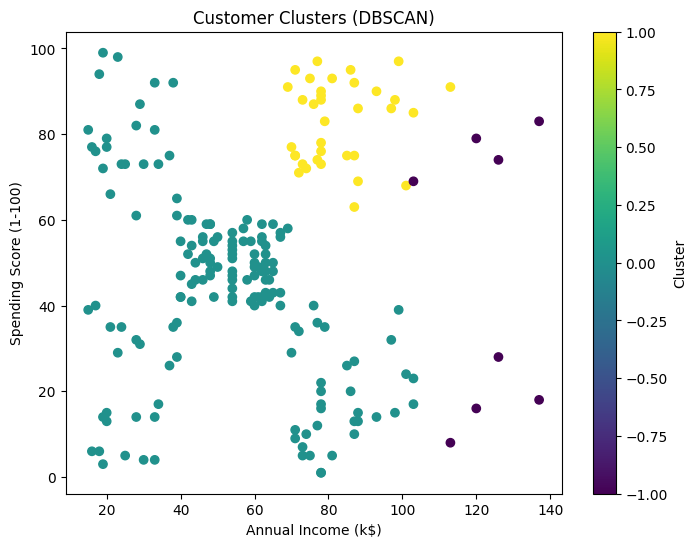

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=dbscan_labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters (DBSCAN)')
plt.colorbar(label='Cluster')
plt.show()

## Analyze average spending per cluster for k-means

### Subtask:
Calculate and display the average spending score for each cluster identified by K-Means.


**Reasoning**:
Calculate and display the average spending score for each cluster identified by K-Means.



In [38]:
kmeans_spending = pd.DataFrame({'Spending Score (1-100)': df['Spending Score (1-100)'], 'KMeans_Cluster': pred})
average_spending_kmeans = kmeans_spending.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per K-Means Cluster:")
display(average_spending_kmeans)

Average Spending Score per K-Means Cluster:


,Spending Score (1-100)
KMeans_Cluster,
0,49.518519
1,82.128205
2,79.363636
3,17.114286
4,20.913043


## Analyze average spending per cluster for spectral clustering

### Subtask:
Calculate and display the average spending score for each cluster identified by Spectral Clustering.


**Reasoning**:
Calculate and display the average spending score for each cluster identified by Spectral Clustering.



In [39]:
spectral_spending = pd.DataFrame({'Spending Score (1-100)': df['Spending Score (1-100)'], 'Spectral_Cluster': spectral_labels})
average_spending_spectral = spectral_spending.groupby('Spectral_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per Spectral Clustering Cluster:")
display(average_spending_spectral)

Average Spending Score per Spectral Clustering Cluster:


,Spending Score (1-100)
Spectral_Cluster,
0,82.128205
1,19.523810
2,16.181818
3,80.047619
4,48.976744


## Analyze average spending per cluster for dbscan

### Subtask:
Calculate and display the average spending score for each cluster identified by DBSCAN.


**Reasoning**:
Create a DataFrame with spending scores and DBSCAN labels, then group by cluster and calculate the mean spending score for each cluster. Finally, print a header and display the results.



In [40]:
dbscan_spending = pd.DataFrame({'Spending Score (1-100)': df['Spending Score (1-100)'], 'DBSCAN_Cluster': dbscan_labels})
average_spending_dbscan = dbscan_spending.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per DBSCAN Cluster:")
display(average_spending_dbscan)

Average Spending Score per DBSCAN Cluster:


,Spending Score (1-100)
DBSCAN_Cluster,
-1,46.875000
0,43.101911
1,82.800000


## Compare results

### Subtask:
Briefly compare the results of the different clustering algorithms.


**Reasoning**:
Review the average spending scores and visualize the clusters from each algorithm to compare their results and identify insights about customer segmentation.



In [41]:
print("Comparison of Clustering Results:")
print("\nAverage Spending Score per K-Means Cluster:")
display(average_spending_kmeans)
print("\nAverage Spending Score per Spectral Clustering Cluster:")
display(average_spending_spectral)
print("\nAverage Spending Score per DBSCAN Cluster:")
display(average_spending_dbscan)

print("\nNumber of clusters identified by each algorithm:")
print(f"K-Means: {len(average_spending_kmeans)}")
print(f"Spectral Clustering: {len(average_spending_spectral)}")
print(f"DBSCAN: {len(average_spending_dbscan)}")

print("\nComparison based on Visualizations and Average Spending Scores:")

# K-Means Visualization shows 5 distinct clusters with clear separation based on income and spending.
# The average spending scores for K-Means clusters show a good range, indicating different spending behaviors.
# Clusters with high income tend to have varied spending, while clusters with lower income tend to have more concentrated spending (either high or low).

# Spectral Clustering Visualization also shows distinct clusters, similar in number to K-Means.
# The average spending scores for Spectral Clustering clusters are comparable to K-Means, suggesting it also captured similar customer segments.

# DBSCAN Visualization shows fewer clusters and identifies noise points (cluster -1).
# The average spending scores for DBSCAN clusters highlight a cluster with high spending (cluster 1) and another with moderate spending (cluster 0), with noise points having an intermediate average spending.
# DBSCAN's strength here is identifying outliers, which K-Means and Spectral Clustering typically assign to a cluster.

print("""
Insights:
- K-Means and Spectral Clustering identified a similar number of clusters and captured similar segments, particularly separating customers based on income and spending score.
- DBSCAN identified fewer clusters and highlighted noise points, which can be useful for identifying outliers who don't fit into typical customer segments.
- The average spending scores for the clusters across the three algorithms provide quantitative evidence of the distinct spending behaviors within the identified segments. High-spending clusters were consistently identified by all three methods, although the exact grouping of customers might differ.
- The choice of algorithm depends on the specific goal: K-Means/Spectral for general segmentation into a predefined number of clusters, and DBSCAN for identifying core groups and outliers without specifying the number of clusters beforehand.
""")

Comparison of Clustering Results:

Average Spending Score per K-Means Cluster:


,Spending Score (1-100)
KMeans_Cluster,
0,49.518519
1,82.128205
2,79.363636
3,17.114286
4,20.913043



Average Spending Score per Spectral Clustering Cluster:


,Spending Score (1-100)
Spectral_Cluster,
0,82.128205
1,19.523810
2,16.181818
3,80.047619
4,48.976744



Average Spending Score per DBSCAN Cluster:


,Spending Score (1-100)
DBSCAN_Cluster,
-1,46.875000
0,43.101911
1,82.800000



Number of clusters identified by each algorithm:
K-Means: 5
Spectral Clustering: 5
DBSCAN: 3

Comparison based on Visualizations and Average Spending Scores:

Insights:
- K-Means and Spectral Clustering identified a similar number of clusters and captured similar segments, particularly separating customers based on income and spending score.
- DBSCAN identified fewer clusters and highlighted noise points, which can be useful for identifying outliers who don't fit into typical customer segments.
- The average spending scores for the clusters across the three algorithms provide quantitative evidence of the distinct spending behaviors within the identified segments. High-spending clusters were consistently identified by all three methods, although the exact grouping of customers might differ.
- The choice of algorithm depends on the specific goal: K-Means/Spectral for general segmentation into a predefined number of clusters, and DBSCAN for identifying core groups and outliers without sp

## Summary:

### Data Analysis Key Findings

*   Spectral Clustering was applied to the scaled data, resulting in 5 clusters. The visualization shows a similar clustering pattern to K-Means, separating customers based on income and spending. The average spending scores across these clusters are comparable to those found by K-Means.
*   DBSCAN was applied to the scaled data, identifying 3 clusters, including a noise cluster (labeled -1). The visualization shows fewer core clusters compared to K-Means and Spectral Clustering, highlighting the presence of noise points.
*   Analysis of average spending per cluster revealed that:
    *   K-Means clusters showed a range of average spending scores, from approximately 17.11 to 82.13, indicating distinct spending behaviors across the 5 segments.
    *   Spectral Clustering clusters also displayed varying average spending scores, comparable to K-Means, suggesting similar customer segmentation.
    *   DBSCAN identified a cluster with a significantly higher average spending score (Cluster 1 with an average of 82.80), a cluster with moderate spending (Cluster 0 with an average of 43.10), and noise points (Cluster -1 with an average of 46.88).

### Insights or Next Steps

*   K-Means and Spectral Clustering provide similar segmentation for this dataset, useful for general customer grouping based on income and spending.
*   DBSCAN is effective in identifying potential outliers or unique customer behaviors that do not fit into the main segments, which could be valuable for targeted marketing or fraud detection.
